# DESAFIO 1

Use o NLTK para criar um pipeline que realize as seguintes tarefas, nesta ordem: 
Tokenization, Sentence Splitting, Lemmatization, Stemming e POS tagging 

Em seguida gere as seguintes informações estatísticas e gráficos de barras em relação ao texto em inglês task1.txt: 
Quantas palavras temos em todo o texto? 
Quantos radicais (stemming) diferentes existem?
Qual o número de sentenças e a média de tokens por sentença?
Gere um gráfico de barra do conjunto de POS tags de todas as palavras do texto. Ordene os resultados e responda: quais classes gramaticais correspondem a mais de 70 ou 80% do total?

In [73]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from string import punctuation
from collections import Counter

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()


[nltk_data] Downloading package punkt to /home/cfarias/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/cfarias/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/cfarias/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [74]:
def read_file(filename: str) -> str:  
  with open(filename, 'r', encoding='utf-8') as file:
    return file.read()

def lematize_tokens(tokens: list) -> list:
    return [lemmatizer.lemmatize(token) for token in tokens]

def stem_tokens(tokens: list) -> list:
    return [stemmer.stem(token) for token in tokens]

def get_onlywords_from_tokens(tokens: list) -> list:
    # usa-se token[0] pois caracteres como ´´ não são pegos na validação. Então nesse caso fica apenas ` que contém no punctuation
    return [token for token in tokens if token[0] not in punctuation and not token.isdigit()]

def get_qtd_tokens_for_sentence(sentence: str) -> int:
  return len([word for word in nltk.word_tokenize(sentence)])

def get_average_tokens_for_sentence(sentence_list: list) -> int:
  return sum(sentence_list) / len(sentence_list)


## Tokenization, Sentence Splitting, Lemmatization, Stemming e POS tagging

In [75]:
text_1 = read_file('task_1.txt')
text_1_word_tokens = nltk.word_tokenize(text_1)
text_1_sent_tokens = nltk.sent_tokenize(text_1)
text_1_lemmas = lematize_tokens(text_1_word_tokens)
text_1_stems = stem_tokens(text_1_word_tokens)
text_1_taggs = nltk.pos_tag(text_1_word_tokens)



## Quantas palavras temos em todo o texto? (também exluindo números)

In [76]:
text_1_onlywords = set(get_onlywords_from_tokens(text_1_word_tokens))

print(f"No text_1 existem {len(text_1_onlywords)} palavras.")


No text_1 existem 280 palavras.


## Quantos radicais (stemming) diferentes existem? (contando apenas com palavras)

In [77]:
text_1_onlyword_stemms = stem_tokens(text_1_onlywords)

text1_vocab = set(text_1_onlyword_stemms)
print(f'No text_1 exitem {len(text1_vocab)} radicais diferentes.')

No text_1 exitem 246 radicais diferentes.


## Qual o número de sentenças e a média de tokens por sentença?

In [87]:

print(f"Existem {len(text_1_sent_tokens)} sentenças no texto 1\n \n")

tokens_for_sentence = { sentence: get_qtd_tokens_for_sentence(sentence) for sentence in text_1_sent_tokens}

for sentence, qtd in tokens_for_sentence.items():
    print(f'A sentença "{sentence}" contém {qtd} tokens.\n')




Existem 23 sentenças no texto 1
A sentença "Artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, unlike the natural intelligence displayed by humans and animals." contém 27 tokens.

A sentença "Leading AI textbooks define the field as the study of intelligent agents: any device that perceives its environment and takes actions that maximize its chance of successfully achieving its goals." contém 32 tokens.

A sentença "[1] Colloquially, the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive" functions that humans associate with the human mind, such as learning and problem solving." contém 42 tokens.

A sentença "[2]

As machines become increasingly capable, tasks considered to require intelligence are often removed from the definition of AI, a phenomenon known as the AI effect." contém 31 tokens.

A sentença "[3] A quip in Tesler's Theorem says AI is whatever hasn't been done ye

In [79]:
average = get_average_tokens_for_sentence(list(tokens_for_sentence.values()))
print(f'Média de *tokens* por sentença é {average:.2f}.')

Média de *tokens* por sentença é 29.65.


## Gere um gráfico de barra do conjunto de POS tags de todas as palavras do texto. Ordene os resultados e responda: quais classes gramaticais correspondem a mais de 70 ou 80% do total?

Counter({'NN': 62, 'JJ': 49, 'NNS': 46, 'IN': 18, 'VBG': 15, 'RB': 14, 'VBP': 14, 'NNP': 13, 'VBN': 12, 'VBD': 9, 'DT': 9, 'VBZ': 6, 'VB': 3, 'JJS': 2, 'MD': 2, 'CC': 2, 'PRP': 1, 'PRP$': 1, 'TO': 1, 'WDT': 1})


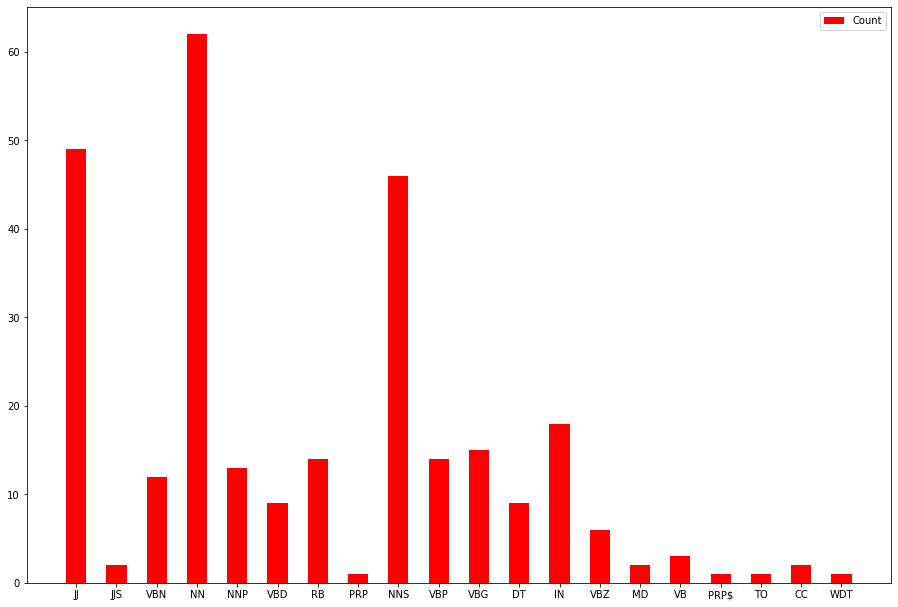

In [80]:
taggs = nltk.pos_tag(text_1_onlywords)
counts = Counter( tag for (word, tag) in taggs)
print(counts)
fig = plt.figure()
ax = fig.add_axes([1,1,2,2])

ax.bar(counts.keys(), counts.values(), width=0.5, color="red")
ax.legend(labels=['Count'])

plt.show()



In [81]:
print(f"Os 3 radicais mais comuns são: {counts.most_common(3)}.")

Os 3 radicais mais comuns são: [('NN', 62), ('JJ', 49), ('NNS', 46)].
